<h1> Sergey Khegay </h1>

### CIS4170
### MatPlotLib Dashboard

<h1 align="center"> Billboard Global 200 Data Visualization </h1>

The following lines of code allows an option to hide all coding portions of the project while leaving output intacked.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### About dataset

The Billboard Global 200 is a weekly record chart published by Billboard magazine. The chart ranks the top songs globally and is based on digital sales and online streaming from over 200 territories worldwide. The __billboard_200.csv__ data includes details of 200 records of songs on a chart as of __5/21/2021__. As well as additional information about each tracks album, release date, popularity, and auto features extracted from __Spotify API__ requests. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Song           | The title of the song                                      |
| Artist         | The name of an artist(s) or group who released the track   |
| Track_URI      | Spotify generaded ID and link assosiated with track        |
| Explicit       | Boolean value identifying whether the song contains        explicit lyrics or words                                                      |
| Album Name     | The title of an album the songs is part of                 |
| Release Date   | The released date of track                                 |
| Popularity     | The Spotify popularity index that ranks each songs on scale from 0-100                                                                    |
| Acousticness   | A confidence measure of whether the track is acoustic                                                                      |
| Danceability   | Danceability describes how suitable a track is for dancing |
| Energy         | Energy is a measure that represents a perceptual measure of intensity and activity                                  |
|Instrumentalness| Predicts whether a track contains no vocals                |
| Liveness       | Detects the presence of an audience in the recording       |
| Loudness       | The overall loudness of a track in decibels (dB)           |
| Speechiness    | Speechiness detects the presence of spoken words in a track|
| Valence        | A measure  describing the musical positiveness conveyed by a track                                              |
| Tempo          | The overall estimated tempo of a track in beats per minute (BPM)                                                                         |
| Key            | The key the track is in. Integers map to pitches using standard Pitch Class notation                                                 |
| Mode           | Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0                                      |
| Time Signature | An estimated overall time signature of a track             |
| Duration       | The duration of the track in millisecond                   |

### Importing Primary Modules and Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
from datetime import datetime

### Loading Data From CSV File  

In [3]:
df = pd.read_csv('billboard.csv',index_col=0, parse_dates=[0])
df.head()

,Song,Artist,Billboard Peak,Track_URI,Explicit,Album Name,Release Date,Popularity,Acousticness,Danceability,...,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Key,Mode,Time Signature,Duration(ms)
0,Montero (Call Me By Your Name),Lil Nas X,1,spotify:track:67BtfxlNbhBmCDR2L2l8qd,True,MONTERO (Call Me By Your Name),2021-03-31,99,0.29700,0.610,...,0.000000,0.3840,-6.682,0.1520,0.758,178.818,G♯/A♭,Minor,4,02:17
1,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,1,spotify:track:4iJyoBOLtHqaGxP12qzhQI,True,Justice,2021-03-19,100,0.32100,0.677,...,0.000000,0.4200,-6.181,0.1190,0.464,90.030,C,Major,4,03:18
2,Levitating,Dua Lipa Featuring DaBaby,3,spotify:track:463CkQjx2Zk1yXoBuierM9,False,Levitating (feat. DaBaby),2020-10-01,91,0.00883,0.702,...,0.000000,0.0674,-3.787,0.0601,0.915,102.977,F♯/G♭,Minor,4,03:23
3,Save Your Tears,The Weeknd,1,spotify:track:37BZB0z9T8Xu7U3e65qxFy,False,Save Your Tears (Remix),2021-04-23,94,0.02150,0.650,...,0.000024,0.0936,-4.645,0.0325,0.593,118.091,C,Major,4,03:11
4,Kiss Me More,Doja Cat Featuring SZA,5,spotify:track:748mdHapucXQri7IAO8yFK,True,Kiss Me More (feat. SZA),2021-04-09,98,0.23500,0.762,...,0.000158,0.1230,-3.541,0.0286,0.742,110.968,G♯/A♭,Major,4,03:28


### Converting and transforming data objects

The following lines of code converts date datatype and extracts information such year, month and season where the song was released.

In [4]:
df['Release Date']= pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month


## Data visualization

### Harmonic Analysis
By looking at the following graphs we can see the harmonic analysis of all songs in the Billboard Chart that indicates an overall preference of an artists and composers. For instance we can see than over 95% of the songs have a time signature of 3 which refered to beats per measure. In terms of modality most of the song are written in minor key. While the most common key signature used by artists and composers is either G#/A♭, C, F#/G♭, and C#/B♭.

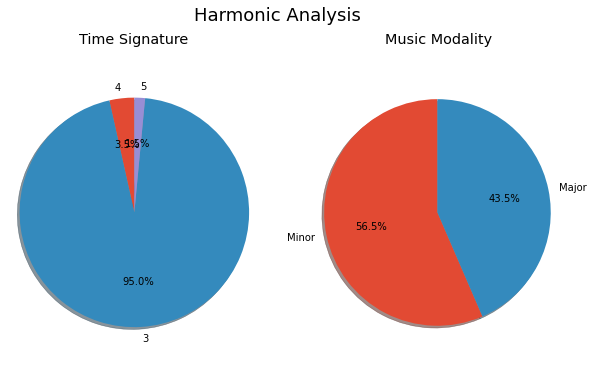

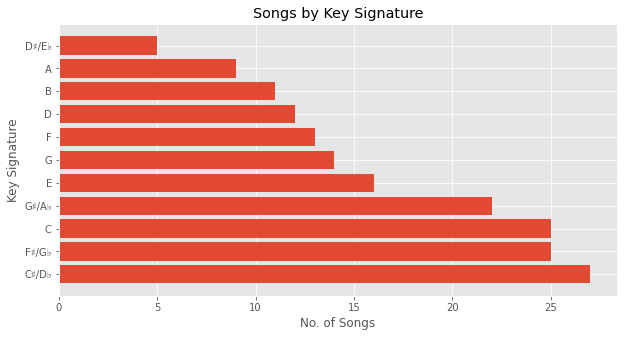

In [5]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2, figsize=(10,6))
plt.suptitle('Harmonic Analysis',ha='center',fontsize=18)
#Time Signature
time_label = df['Time Signature'].unique()
time = df.groupby('Time Signature')['Song'].count()
ax[0].pie(time, autopct='%1.1f%%', labels=time_label, shadow=True, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Time Signature')
#Mode
mode_label = df['Mode'].unique()
mode = df.groupby('Mode')['Song'].count()
ax[1].pie(mode, autopct='%1.1f%%', labels=mode_label, shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Music Modality')
# Key Signature
artistsCounts = df.groupby('Key')['Artist'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(artistsCounts.index, artistsCounts.values, align='center')
ax.set_xlabel('No. of Songs')
ax.set_ylabel('Key Signature')
ax.set_title('Songs by Key Signature')

plt.show()

### Audio Analysis
By looking at the following visual we can see the overall trend of audio characteristics over the years. Which in some cases can be used to interpet the artists and composers preference in writing hit songs. For instance we can see that between year 2000 and 2010, there was increasing interest in acoustic (music that solely or primarily uses instruments) music. In terms of energy (how bright and fast a song) we can see an in increase over the years, as well as, a sudden spike and drop in late 2000's and early 2010's. Meanwhile, starting from mid 2000s there has been a steady growth in tracks dancebility.

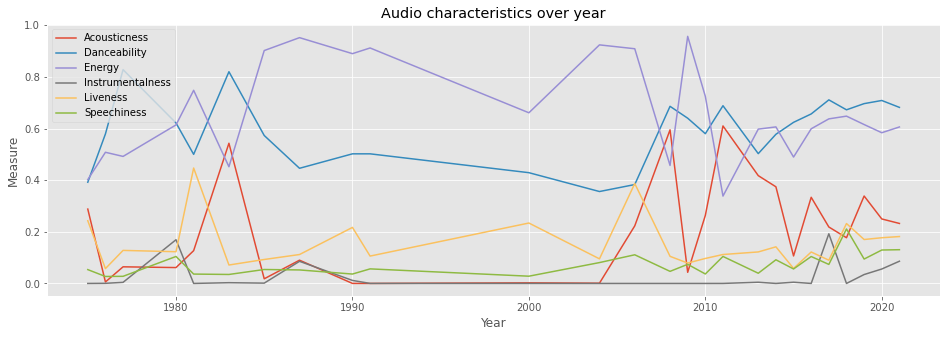

In [6]:
fig, ax = plt.subplots(figsize=(16, 5))
columns = ["Acousticness","Danceability","Energy",
           "Instrumentalness","Liveness", "Speechiness"]
for col in columns:
    x = df.groupby("Year")[col].mean()
    ax.plot(x.index,x,label=col)
ax.legend()
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
plt.show()

In the following graphs we can see scatterpot distribution of audio feautures and relative track popularity. For instance we can identify that most of the popular tracks measured between 0.6-0.8 in Energy and Dancebility. Likwise by looking at speechiness and tempo in relation to dancebility we are able to identify that most of the songs have significantly low amount of lyrics/words, while the tempo between 60-140 BPM which is a moderate speed for most songs. Similarly, most of the songs with such tempo measure an energy between 0.4-0.8 units.

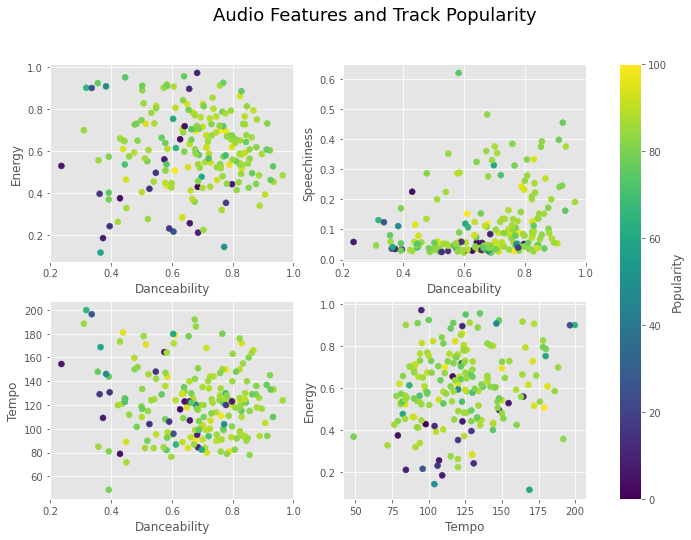

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
g=ax[0,0].scatter(df['Danceability'],
                  df['Energy'],
                  c=df['Popularity'])
fig.colorbar(g, ax=ax, label='Popularity')
ax[0,0].set_xlabel("Danceability")
ax[0,0].set_ylabel("Energy")

ax[0,1].scatter(df['Danceability'],
                df['Speechiness'],
                 c=df['Popularity'])
ax[0,1].set_xlabel("Danceability")
ax[0,1].set_ylabel("Speechiness")

ax[1,0].scatter(df['Danceability'],
                df['Tempo'],
                c=df['Popularity'])
ax[1,0].set_xlabel("Danceability")
ax[1,0].set_ylabel("Tempo")

ax[1,1].scatter(df['Tempo'],
                df['Energy'],
                c=df['Popularity'])
ax[1,1].set_xlabel("Tempo")
ax[1,1].set_ylabel("Energy")

plt.suptitle('Audio Features and Track Popularity',ha='center',fontsize=18)
plt.show()

### Track Analysis
The following graphs analyze the artists and tracks features. For instance the "Top 10 Artists with Most Popularity" indicates that as of the moment, Billie Eilish has the most sum of popularity. Consequently, she is one of the leading artists with most number of songs trending on the chart. 

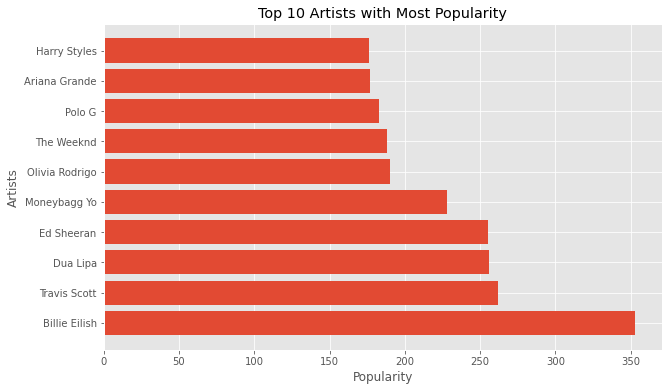

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
x = df.groupby("Artist")["Popularity"].sum().sort_values(ascending=False).head(10)
ax.barh(x.index, x)
ax.set_title('Top 10 Artists with Most Popularity')
ax.set_ylabel('Artists')
ax.set_xlabel('Popularity')
plt.show()

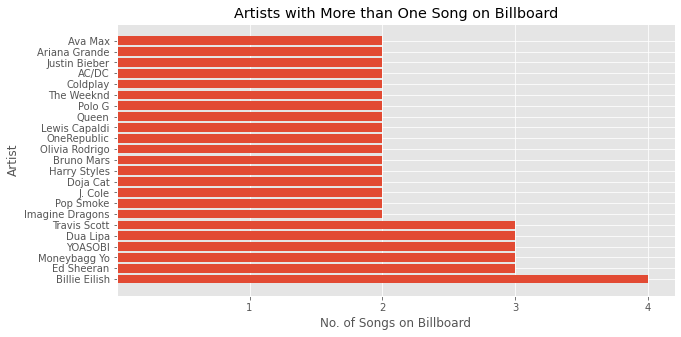

In [9]:
artistsCounts = df.groupby('Artist')['Artist'].count().sort_values(ascending=False)
x = artistsCounts[artistsCounts>1]
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(x.index, x.values, align='center')
ax.set_xlabel('No. of Songs on Billboard')
ax.set_xticks([1,2,3,4])
ax.set_ylabel('Artist')
ax.set_title('Artists with More than One Song on Billboard')
plt.show()

By looking at the artist collaboration, most of the songs are solo's, while over 64.5% of those hits contain explicit lyrics. Lastly, by looking at release date we can identify the most popular month and season when the tracks were released. For instance we can see that most of the songs were released during Winter and Spring. Meanwhile, over 20 songs were released in January, March, and April.

In [10]:
def tidy_split(df, column, sep='|', keep=False):
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df
artists = tidy_split(df, 'Artist', 'Featuring').dropna()

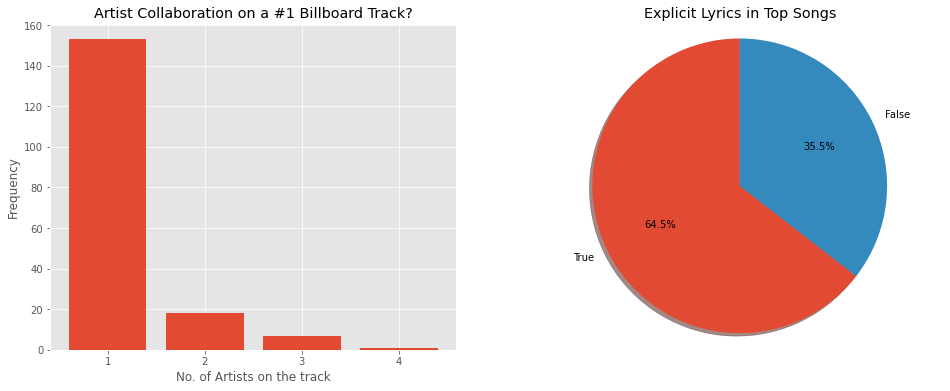

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
noPeople = artists.groupby('Artist').count()['Track_URI'].value_counts()
ax[0].bar(noPeople.index, noPeople.values )
ax[0].set_xticks([1,2,3,4])
ax[0].set_title('Artist Collaboration on a #1 Billboard Track?')
ax[0].set_xlabel("No. of Artists on the track")
ax[0].set_ylabel("Frequency")

labels = df['Explicit'].unique()
x = df.groupby('Explicit')['Artist'].count()
ax[1].pie(x, autopct='%1.1f%%', labels=labels, shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Explicit Lyrics in Top Songs')

plt.show()

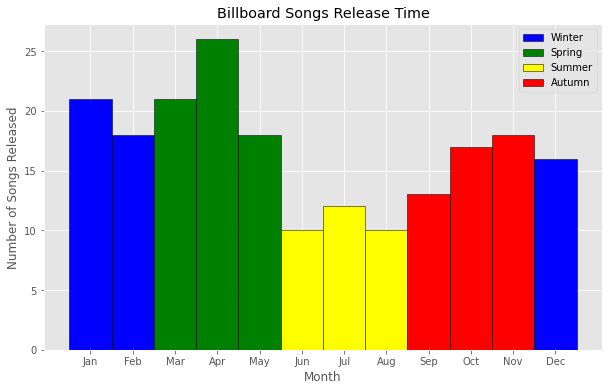

In [12]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
bins = [1,2,3,4,5,6,7,8,9,10,11,12]
season = ['Winter', 'Spring', 'Summer', 'Autumn']
fig, ax = plt.subplots(figsize=(10,6))
n, bins1, patches = ax.hist(df['Month'], edgecolor="k", align='left', bins=12, range=(1,13))
ax.set_xticks(bins)
for m in range(-1,2):
    patches[m].set_fc("blue")
for m in range(2,5):
    patches[m].set_fc("green")
for m in range(5,8):
    patches[m].set_fc("yellow")
for m in range(8,11):
    patches[m].set_fc('red')
handles = [Rectangle((0,0),1,1,1,color=c,ec="k") for c in ["blue","green", "yellow", 'red']]
ax.legend(handles, season)
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Songs Released')
ax.set_title('Billboard Songs Release Time')
plt.show()